In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
train_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train_df.shape

(1460, 81)

In [6]:
test_df.shape

(1459, 80)

In [7]:
data = pd.concat([train_df,test_df])

In [8]:
data.shape

(2919, 81)

In [9]:

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


**Checking for null values**

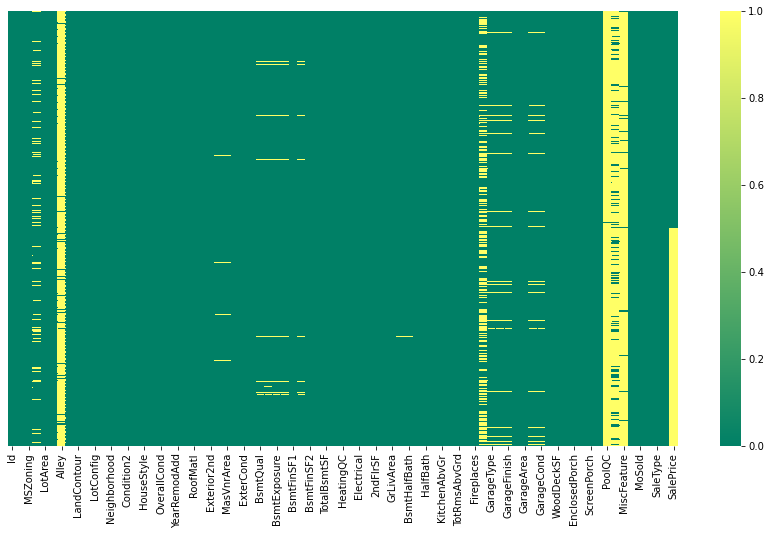

In [10]:
plt.figure(figsize=(15,8))
sns.heatmap(data.isnull(), yticklabels = False, cmap = 'summer')

In [11]:
data.isnull().sum().sort_values(ascending=False)[0:32]


PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Utilities          2
Functional         2
BsmtFullBath       2
BsmtHalfBath       2
GarageArea         1
BsmtFinSF2         1
Exterior1st        1
TotalBsmtSF        1
GarageCars         1
BsmtUnfSF          1
Electrical         1
BsmtFinSF1         1
dtype: int64

**Now getting rid of the columns with most NAN values **

In [12]:
data.drop(['PoolQC','MiscFeature','Alley','Fence','Id'], axis=1, inplace=True)


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   Utilities      2917 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   object 
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemo

**Now we are going to fill the NaN rows.   
Note- There are many fields with object types, Since we can't take average of them,we are going to use mode.**

In [14]:
data.isnull().sum().sort_values(ascending=False)[0:32]


SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageCond       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
Utilities          2
Functional         2
BsmtHalfBath       2
GarageArea         1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Exterior2nd        1
Exterior1st        1
Electrical         1
GarageCars         1
KitchenQual        1
YearBuilt          0
dtype: int64

In [15]:
print("No. of columns containing null values")
print(len(data.columns[data.isna().any()]))

No. of columns containing null values
31


In [16]:
obj_col = ['MSZoning','Utilities','LotFrontage','Exterior2nd','Exterior1st','MasVnrType','BsmtCond', 'BsmtQual','BsmtExposure','BsmtFinType2','BsmtFinType1' ,'Electrical', 'KitchenQual', 'GarageType','FireplaceQu'
          ,'GarageFinish', 'GarageQual','GarageCond' ,'SaleType','Functional'  ]




for item in obj_col:
    data[item] = data[item].fillna(data[item].mode()[0])


In [17]:
num_col = ['SalePrice','GarageYrBlt','MasVnrArea','BsmtFullBath','BsmtHalfBath','GarageArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','GarageCars']
for item in num_col:
    data[item] = data[item].fillna(data[item].mean())

**OneHotEncoding for categorial columns**

In [18]:
data = pd.get_dummies(data, drop_first=True)

In [19]:
data.isnull().sum().sort_values(ascending=False)[0:10]


SaleCondition_Partial    0
Neighborhood_Sawyer      0
Condition1_RRNe          0
Condition1_RRAn          0
Condition1_RRAe          0
Condition1_PosN          0
Condition1_PosA          0
Condition1_Norm          0
Condition1_Feedr         0
Neighborhood_Veenker     0
dtype: int64

In [20]:
data.shape

(2919, 237)

In [21]:
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0


**Split data for train, test**

In [22]:
data_train = data.iloc[:1460, :]
data_test = data.iloc[1460:, :]

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train= data_train.drop('SalePrice', axis=1).values
y_train= data_train['SalePrice'].values

##X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=101)




In [25]:
X_test= data_test.drop('SalePrice', axis=1).values


In [26]:
from sklearn.ensemble import RandomForestClassifier
rdf= RandomForestClassifier()

In [27]:
rdf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
y_test_predict = rdf.predict(X_test)

In [29]:
y_test_predict

array([115000., 155000., 192000., ..., 140000.,  93500., 215000.])

In [30]:
#output = pd.DataFrame({'Id': test_df.Id, 'SalePrice': y_test_predict})
#output.to_csv('house_sales_prediction_simple.csv', index=False)
#print("Done!")

**XGBOOOST Gradient boosting
**

In [31]:
from sklearn.metrics import r2_score

In [32]:
from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

****how close the data are to the fitted regression line**  Hence R^2**************

In [33]:
y_train_predict = regressor.predict(X_train)
print(r2_score(y_train,y_train_predict))

0.999460734924097


In [34]:
y_test_predict = regressor.predict(X_test)

In [35]:
output = pd.DataFrame({'Id': test_df.Id, 'SalePrice': y_test_predict})
output.to_csv('house_sales_prediction_simple.csv', index=False)
print("Done!")

Done!
